# PROJECT EV Population in the US

Our project, 'USA Electric Car Trends,' focuses on understanding and predicting the use of electric cars in the United States. We'll use machine learning to study how electric cars are distributed across the country. By looking at factors like where people live, the types of electric cars they use, and government incentives, we aim to give insights into how electric cars are growing in popularity. This research can help with future planning and decisions on electric cars in the USA.


Author 1: Kamel Lehmoudi, up202301437 <br>
Author 2: Moraless Philius, up202302762

## Library

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## Preprocessing

In [8]:
df = pd.read_csv("Data/Electric_Vehicle_Population_Data.csv", delimiter=",")

#### Data Analysis

In [9]:
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020.0,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258.0,0.0,43.0,249675142.0,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022.0,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,1.0,233928502.0,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023.0,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,14.0,229675939.0,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10


In [10]:
df = df.drop_duplicates()
columns_to_clean = ['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
                    'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                    'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
                    'Vehicle Location', 'Electric Utility', '2020 Census Tract']
df = df.dropna(subset=columns_to_clean)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149821 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         149821 non-null  object 
 1   County                                             149821 non-null  object 
 2   City                                               149821 non-null  object 
 3   State                                              149821 non-null  object 
 4   Postal Code                                        149821 non-null  float64
 5   Model Year                                         149821 non-null  float64
 6   Make                                               149821 non-null  object 
 7   Model                                              149821 non-null  object 
 8   Electric Vehicle Type                              149821 non-null  object

 While data analysis can involve numerous graphs to visualize the distribution of features in a dataset, it's important to note that the mere act of plotting graphs doesn't inherently assign significance to the analysis. However, these visualizations serve as valuable tools to observe and comprehend the distribution patterns of features within the dataset.

Exemple: Observation of the brand distribution across the vehicle registered in the data set:

#### Splitting the data

In [12]:
# Split the data into training, validation, and test sets
train_df, temp_df = train_test_split(df, test_size=0.25, random_state=42)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Save the datasets to CSV files
train_df.to_csv("Data/train_dataset.csv", index=False)
test_df.to_csv("Data/test_dataset.csv", index=False)
validation_df.to_csv("Data/validation_dataset.csv", index=False)

# Display the shapes of the datasets
print(f"shape of the training data set : {train_df.shape}")
print(f"shape of the test data set : {test_df.shape}")
print(f"Shape of the validation dataset: {validation_df.shape}")



shape of the training data set : (112365, 17)
shape of the test data set : (18728, 17)
Shape of the validation dataset: (18728, 17)


## Predictive Model for Electric Range:
Objective: Build a model to predict the electric range of vehicles based on features like model year, brand, and electric vehicle type.



### Linear Regression 
Let's see how well this model perform for predicting the range of a vehicle based on our data .

Mean Squared Error: 8982.493287441788


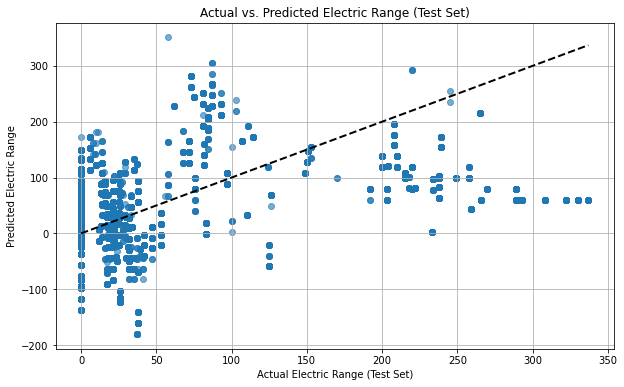

In [13]:
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# The data :

#train_df = training data
#test_df = test data
#validation_df = validation data

# Extracting relevant columns from the training dataset 
#X (training)
model_year = train_df.iloc[:, 5].values
brand = train_df.iloc[:, 6].values
vehicle_type = train_df.iloc[:, 8].values
#Y (taining)
electric_range = train_df.iloc[:, 10].values.astype(float)



# Encoding categorical variables: Brand and Vehicle Type
label_encoder_brand = LabelEncoder()
label_encoder_type = LabelEncoder()
brand_encoded = label_encoder_brand.fit_transform(brand)
type_encoded = label_encoder_type.fit_transform(vehicle_type)

# Combine extracted features into a feature matrix
features_encoded = np.column_stack((model_year, brand_encoded, type_encoded, electric_range))

# Splitting features and target variable
X = features_encoded[:, :-1].astype(float)
y = features_encoded[:, -1].astype(float)

#-------------------------------------------------------------------------------------------------------------------------------------------------
# Extract relevant columns from the test dataset 
#X (test)
model_year_test = test_df.iloc[:, 5].values
brand_test = test_df.iloc[:, 6].values
vehicle_type_test = test_df.iloc[:, 8].values
#Y (test)
electric_range_test = test_df.iloc[:, 10].values.astype(float)


# Encoding categorical variables for the test set using the same LabelEncoders
brand_encoded_test = label_encoder_brand.fit_transform(brand_test)
type_encoded_test = label_encoder_type.fit_transform(vehicle_type_test)

# Combine the extracted features into a feature matrix for the test set
features_encoded_test = np.column_stack((model_year_test, brand_encoded_test, type_encoded_test, electric_range_test))

# Splitting features and target variable for the test set
Xtest = features_encoded_test[:, :-1].astype(float)
ytest = features_encoded_test[:, -1].astype(float)
#----------------------------------------------------------------------------------------------------------------------------------
#preparing the validation 

# Extract relevant columns from the validation dataset 
#X (validation)
model_year_validation = validation_df.iloc[:, 5].values
brand_validation = validation_df.iloc[:, 6].values
vehicle_type_validation = validation_df.iloc[:, 8].values
#Y (validation)
electric_range_validation = validation_df.iloc[:, 10].values.astype(float)


# Encoding categorical variables for the test set using the same LabelEncoders
brand_encoded_validation = label_encoder_brand.fit_transform(brand_validation)
type_encoded_validation = label_encoder_type.fit_transform(vehicle_type_validation)

# Combine the extracted features into a feature matrix for the test set
features_encoded_validation = np.column_stack((model_year_validation, brand_encoded_validation, type_encoded_validation, electric_range_validation))

# Splitting features and target variable for the test set
Xvalidation = features_encoded_validation[:, :-1].astype(float)
yvalidation = features_encoded_validation[:, -1].astype(float)

#------------------------------------------------------------------------------------------------------------------------------------
# Preprocessing categorical columns using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [1, 2])  # Encodes brand and vehicle type
    ],
    remainder='passthrough'
)

# Linear Regression model in a pipeline with OneHotEncoder for categorical columns
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fitting the model
pipeline.fit(X, y)

# Predicting on the test set
y_pred_test = pipeline.predict(Xtest)

# Evaluating model performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_pred_test, ytest)
print(f"Mean Squared Error: {mse}")

# Scatter plot for predicted vs. actual electric range in the test set
plt.figure(figsize=(10, 6))
plt.scatter(ytest, y_pred_test, alpha=0.6)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2)
plt.xlabel('Actual Electric Range (Test Set)')
plt.ylabel('Predicted Electric Range')
plt.title('Actual vs. Predicted Electric Range (Test Set)')
plt.grid()
plt.show()


03/01 : 
Approach: Discriminative models directly learn the decision boundary or conditional probability 
P(Y/X) without modeling the underlying probability distributions of individual classes.

Example Algorithms: Logistic Regression, Support Vector Machines (SVM), Decision Trees, Neural Networks.

Generative models might be more complex as they model the joint distribution, while discriminative models may be simpler and more computationally efficient as they focus only on the decision boundary.

 ### Decision trees for Electric Range prediction

Mean Squared Error: 3930.169704001314


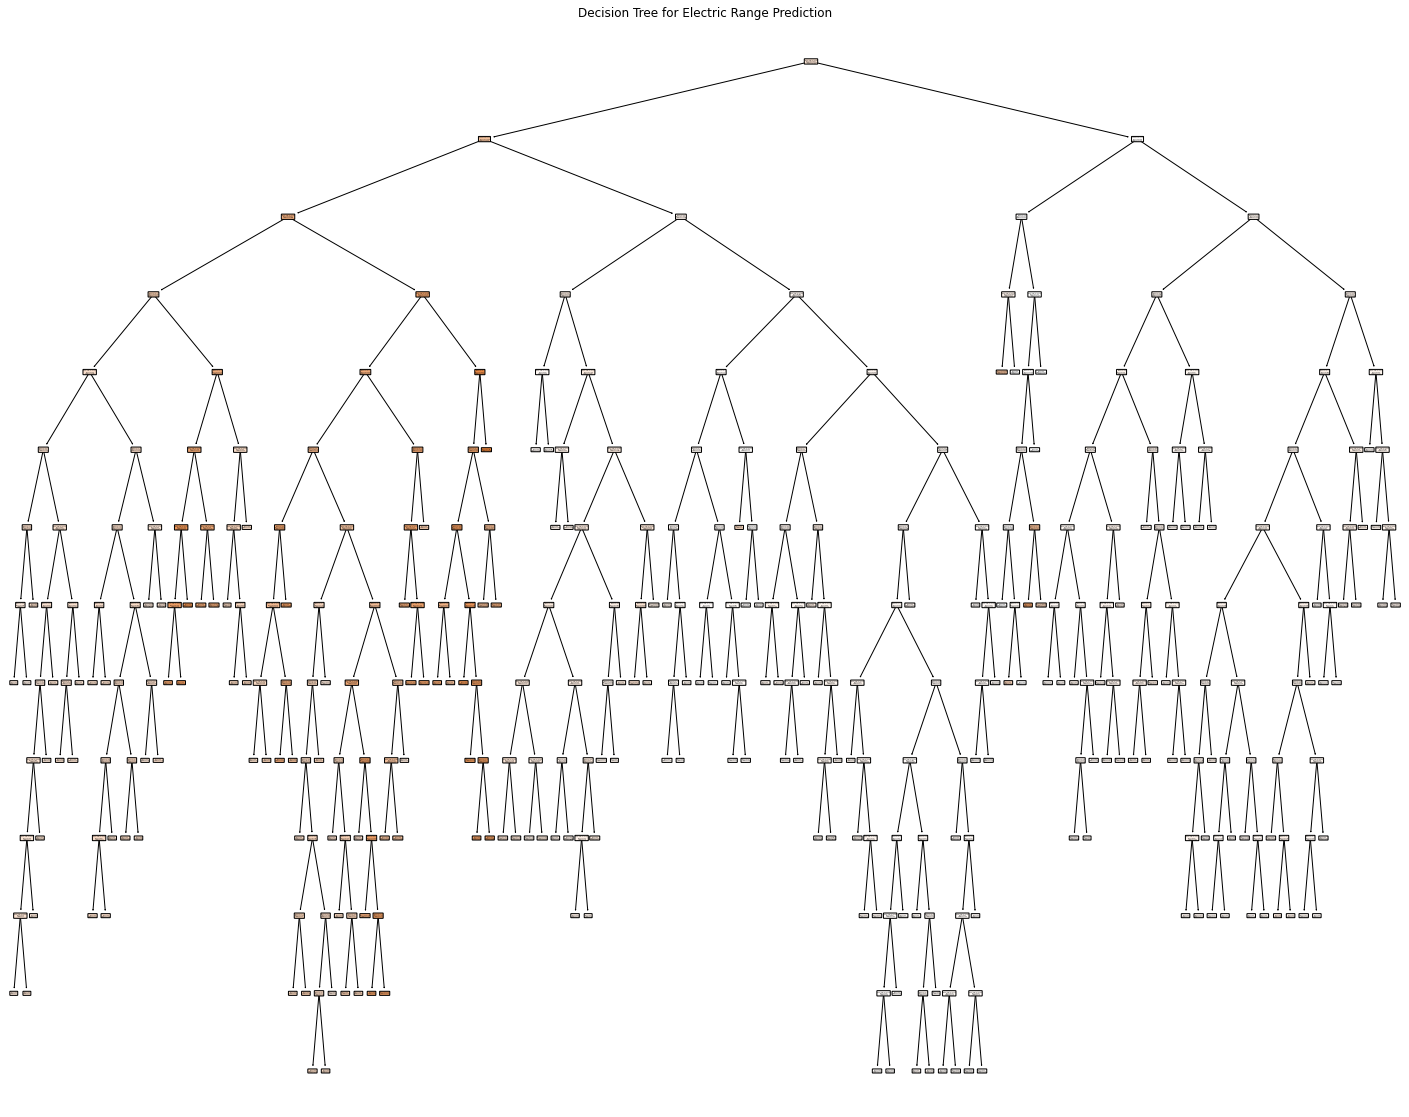

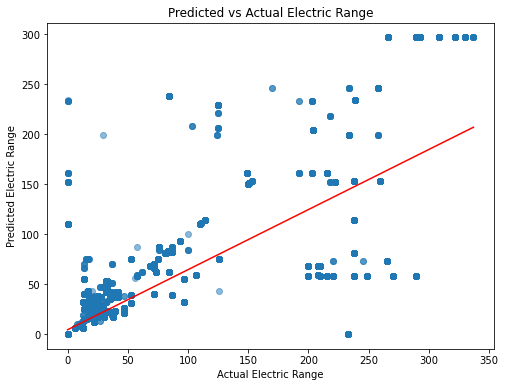

In [14]:
#decision trees : 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


# Build and train Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X, y)

# Predict electric range for the validation
y_pred_test = tree_reg.predict(Xtest)

# Evaluate the model
mse = mean_squared_error(ytest, y_pred_test)
print(f"Mean Squared Error: {mse}")

# Plot the decision tree
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
plot_tree(tree_reg, feature_names=['Model Year', 'Brand', 'Vehicle Type'], filled=True, rounded=True)
plt.title('Decision Tree for Electric Range Prediction')
plt.show()

# Plot predicted vs actual values for electric range
plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred_test, alpha=0.5)
plt.plot(np.unique(ytest), np.poly1d(np.polyfit(ytest, y_pred_test, 1))(np.unique(ytest)), color='red')  # Fit a linear curve
plt.xlabel('Actual Electric Range')
plt.ylabel('Predicted Electric Range')
plt.title('Predicted vs Actual Electric Range')
plt.show()

In [15]:
#Hyperparameter Tuning: Adjust the hyperparameters of the Decision Tree model. 
#For example, you can change the maximum depth of the tree, minimum samples per leaf, or the criterion for splitting.
#This might help in finding a set of hyperparameters that lead to lower mean squared error.

from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'max_depth': [None,1 ,2, 3, 5, 6, 7, 8, 9, 10, 15],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_tree_reg = DecisionTreeRegressor(**best_params, random_state=42)
best_tree_reg.fit(Xvalidation, yvalidation)

# Predict and evaluate the model
y_pred_best = best_tree_reg.predict(Xtest)
mse_best = mean_squared_error(ytest, y_pred_best)
print(f"Mean Squared Error (Best Model): {mse_best}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean Squared Error (Best Model): 804.8309369047074


The MSE doesn't getter better because the decision trees function "tree_reg = DecisionTreeRegressor(random_state=42)" already train the model with the best hyperparameter and have more range to find the optimal solution than us manually. So let's validate another way to minimize the MSE.

In [16]:
# Using Random Forest Regression, which combine multiple models to improve predictive performance.

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Fit the Random Forest model
rf_reg.fit(X, y)

# Predict on the validation set
y_pred_rf = rf_reg.predict(Xvalidation)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(yvalidation, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")

# Predict on the test set
y_pred_rf_test = rf_reg.predict(Xtest)

# Evaluate the Random Forest model on the test set
mse_rf_test = mean_squared_error(ytest, y_pred_rf_test)
print(f"Mean Squared Error (Random Forest - Test): {mse_rf_test}")

Mean Squared Error (Random Forest): 5235.127268320016
Mean Squared Error (Random Forest - Test): 3927.372499162779


Test set MSE is lower than the validation set MSE, which might be a sign of overfitting to the validation data.

In [17]:
# Using Gradient Boosting Regression same Idea as Random Forest Regression

from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(random_state=42)

# Fit the Gradient Boosting model
gb_reg.fit(X, y)

# Predict on the test set
y_pred_gb = gb_reg.predict(Xvalidation)

# Evaluate the Gradient Boosting model
mse_gb = mean_squared_error(yvalidation, y_pred_gb)
print(f"Mean Squared Error (Gradient Boosting): {mse_gb}")

# Predict on the test set
y_pred_gb_test = gb_reg.predict(Xtest)

# Evaluate the Random Forest model on the test set
mse_rf_test = mean_squared_error(ytest, y_pred_gb_test)
print(f"Mean Squared Error (Gradient Boosting - Test): {mse_rf_test}")


Mean Squared Error (Gradient Boosting): 1937.5749600110767
Mean Squared Error (Gradient Boosting - Test): 1673.1785875111289


 Gradient Boosting model may be performing reasonably well on the validation set but might not generalize as well to unseen data in the test set.

(Random Forest and Gradient Boosting) These two methods doesnt perform as well as cross validation, we can see a hight MSE resulting from these two method, so one thing we can do is an Error analysis 

Fold 1 (Train) MSE: 134.37402481714537
Fold 2 (Train) MSE: 116.22830492437932
Fold 3 (Train) MSE: 136.5650925372962
Fold 4 (Train) MSE: 93.75870460139117
Fold 5 (Train) MSE: 93.87581714707359


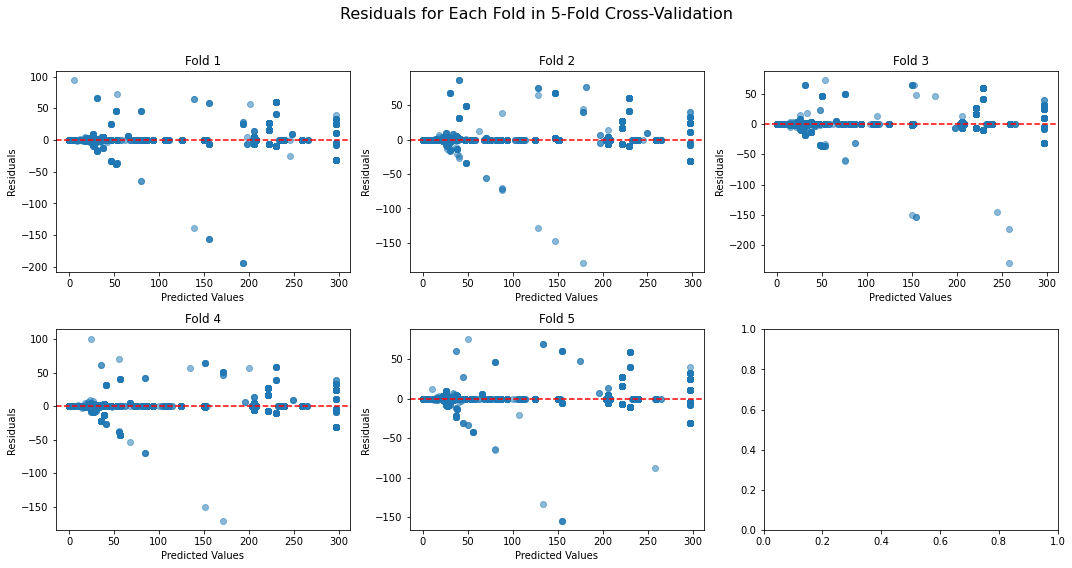

Fold 1 (Test) MSE: 116.83811919377816
Fold 2 (Test) MSE: 116.37561548795307
Fold 3 (Test) MSE: 116.51661429704615
Fold 4 (Test) MSE: 116.55917212292223
Fold 5 (Test) MSE: 116.10368734451066

Mean Squared Error (Cross-Validation): 114.96038880545714
Mean Squared Error (Cross-Validation - Test Set): 116.47864168924207


In [18]:
# Using cross validation to better estimate the model's performance. 
# It helps to ensure that the model's performance is not biased towards the specific training and testing split.
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an array to store MSE scores for each fold
mse_scores = []
mse_scores_test = []
# Create subplots for residuals
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Residuals for Each Fold in 5-Fold Cross-Validation', fontsize=16)

for i, (train_idx, val_idx) in enumerate(kf.split(Xvalidation, yvalidation), 1):
    # Split the data
    X_train_fold, X_validation_fold = Xvalidation[train_idx], Xvalidation[val_idx]
    y_train_fold, y_validation_fold = yvalidation[train_idx], yvalidation[val_idx]

    # Fit the model on the training fold
    tree_reg.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_pred_fold = tree_reg.predict(X_validation_fold)

    # Calculate residuals for the fold
    residuals_fold = y_validation_fold - y_pred_fold

    # Plot residuals
    row, col = divmod(i - 1, 3)
    axes[row, col].scatter(y_pred_fold, residuals_fold, alpha=0.5)
    axes[row, col].axhline(y=0, color='red', linestyle='--')
    axes[row, col].set_title(f'Fold {i}')
    axes[row, col].set_xlabel('Predicted Values')
    axes[row, col].set_ylabel('Residuals')

    # Calculate MSE for the fold
    mse_fold = np.mean(residuals_fold**2)
    mse_scores.append(mse_fold)

    # Print MSE for the fold
    print(f"Fold {i} (Train) MSE: {mse_fold}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
for i, (train_idx, test_idx) in enumerate(kf.split(Xtest, ytest), 1):
    # Split the data
    X_train_fold, X_test_fold = Xtest[train_idx], Xtest[test_idx]
    y_train_fold, y_test_fold = ytest[train_idx], ytest[test_idx]

    # Split the data for test evaluation
    X_test_fold, y_test_fold = Xtest, ytest  # Use the entire test set

     # Fit the model on the training fold
    tree_reg.fit(X_train_fold, y_train_fold)

    # Predict on the entire test set
    y_pred_test_fold = tree_reg.predict(X_test_fold)

    # Calculate residuals for the test fold
    residuals_test_fold = y_test_fold - y_pred_test_fold

    # Calculate MSE for the test fold
    mse_test_fold = np.mean(residuals_test_fold**2)
    mse_scores_test.append(mse_test_fold)

    # Print MSE for the test fold
    print(f"Fold {i} (Test) MSE: {mse_test_fold}")


# Calculate mean MSE across all folds
mean_mse = np.mean(mse_scores)
mean_mse_test = np.mean(mse_scores_test)
print(f"\nMean Squared Error (Cross-Validation): {mean_mse}")
print(f"Mean Squared Error (Cross-Validation - Test Set): {mean_mse_test}")

The MSE values for cross-validation vary significantly across folds, indicating some variability in model performance on different subsets of the data.

The MSE on the test set for each fold also shows variability, with Fold 4 having the lowest test MSE.
The model might be performing better on the test set compared to the individual folds in cross-validation.

The mean MSE on the test set is lower than the cross-validation mean MSE, which is a positive sign.

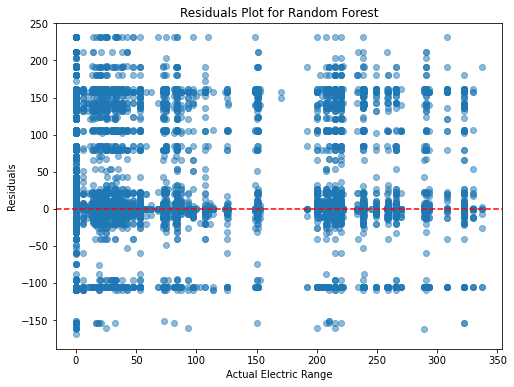

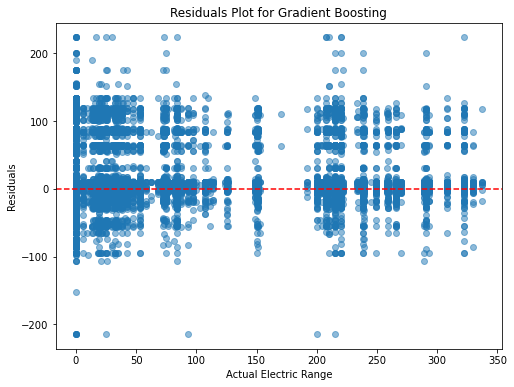

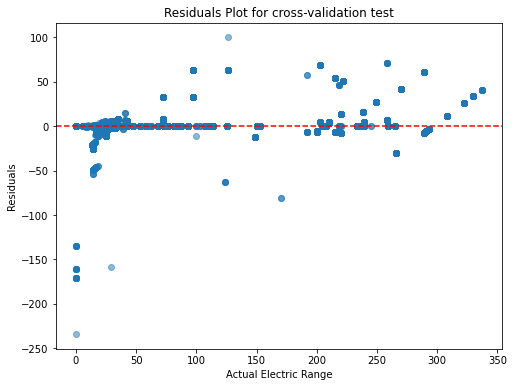

In [19]:
# Calculate residuals for Random Forest and Gradient Boosting
residuals_rf = yvalidation - y_pred_rf
residuals_gb = yvalidation - y_pred_gb
residuals_cv =  residuals_test_fold

# Plot residuals for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(ytest, residuals_rf, alpha=0.5)
plt.xlabel('Actual Electric Range')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Random Forest')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at y=0
plt.show()

# Plot residuals for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(ytest, residuals_gb, alpha=0.5)
plt.xlabel('Actual Electric Range')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Gradient Boosting')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at y=0
plt.show() 

# Plot residuals for cross-validation
plt.figure(figsize=(8, 6))
plt.scatter(ytest, residuals_cv, alpha=0.5)
plt.xlabel('Actual Electric Range')
plt.ylabel('Residuals')
plt.title('Residuals Plot for cross-validation test')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at y=0
plt.show()

In this two graph we can take into account : 

-Spread of Residuals: Observe the spread of residuals around the horizontal line at y=0. A more concentrated spread indicates better model performance.

another thing we can look at is the Patterns in Residuals, we need to look for any patterns in residuals. If the residuals show a pattern (e.g., increasing/decreasing as the actual value increases), it indicates a systematic error.

(reminder:A systematic error refers to a consistent deviation or bias in the measurements or predictions that occurs consistently in the same direction or manner across the dataset. Unlike random errors that are unpredictable and may cancel each other out, systematic errors affect the entire dataset in a consistent way.
for example: Instrument Calibration is a systematic error)



## Customer Segmentation for Electric Vehicles:
Objective: Segment electric vehicle customers based on demographic features to tailor marketing strategies and services.
we can use the model year,the range,make (brand) 

### Filtered data to have 5 most use Make

In [20]:
# Training
top_brands = train_df['Make'].value_counts().head(5).index
temp_train = train_df[train_df['Make'].isin(top_brands)]
y_train = temp_train['Make']
X_train = temp_train[['Model Year', 'Electric Range']]

# Test
top_brands = test_df['Make'].value_counts().head(5).index
temp_test = test_df[test_df['Make'].isin(top_brands)]
y_test = temp_test['Make']
X_test = temp_test[['Model Year', 'Electric Range']] 

In [21]:
print(f'y_train : {y_train.unique()}')
print(f'y_test : {y_test.unique()}')

y_train : ['FORD' 'TESLA' 'CHEVROLET' 'NISSAN' 'BMW']
y_test : ['TESLA' 'NISSAN' 'BMW' 'FORD' 'CHEVROLET']


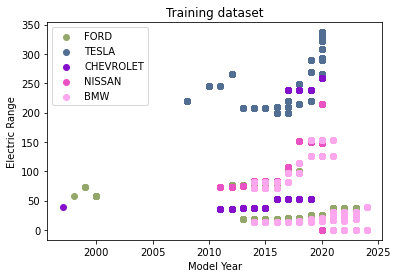

In [22]:
list_class = temp_train['Make'].unique()

fig, ax = plt.subplots()

colors = np.random.rand(len(list_class), 3)

# Plotting training data
for i, cls in enumerate(list_class):
    idxs = y_train == cls
    ax.scatter(X_train.loc[idxs, 'Model Year'], X_train.loc[idxs, 'Electric Range'], label=cls, color=colors[i])
    ax.set_title('Training dataset')
    ax.set_xlabel('Model Year')
    ax.set_ylabel('Electric Range')

ax.legend()
plt.show()

### Error function 

In [23]:
def calculate_error(predictor, label):
    incorrect_predictions = np.sum(predictor != label)
    size_sample = len(predictor)
    error_rate = incorrect_predictions / size_sample
    return error_rate

### Naive Bayes 

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train.ravel())

y_pred_bayes = nb_classifier.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred_bayes)
print(f"model prediction accuracy (Naive Bayes) : {accuracy : .3}")

model prediction accuracy (Naive Bayes) :  0.701


In [25]:
Pe = calculate_error(y_pred_bayes,y_test)
print(f'Classification probability error (Naive Bayes): {Pe : .3}')

Classification probability error (Naive Bayes):  0.299


### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer un modèle de régression logistique avec plus d'itérations
logistic_model = LogisticRegression(multi_class='multinomial', max_iter=100)

# Entraîner le modèle avec les données normalisées
logistic_model.fit(X_train_scaled, y_train)

# Prédire les étiquettes pour l'ensemble de test normalisé
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Calculer la précision du modèle
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"model prediction accuracy (Logistic Regresion) : {accuracy_logistic : .3}")

model prediction accuracy (Logistic Regresion) :  0.711


In [27]:
Pe = calculate_error(y_pred_logistic,y_test)
print(f'Classification probability error (Logistic Regresion): {Pe : .3}')

Classification probability error (Logistic Regresion):  0.289


In [28]:
print(y_train.unique())

['FORD' 'TESLA' 'CHEVROLET' 'NISSAN' 'BMW']


### Neural Network 

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_scaled, y_train_onehot, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(X_test_scaled, y_test_onehot)
print(f"model prediction accuracy (Neural Network) : {accuracy : .3}")

ModuleNotFoundError: No module named 'keras'

### Supported Vector Machine 

-Electric Vehicle Adoption Prediction:
Objective: Use historical data to predict the future adoption and growth of electric vehicles in different states or counties.

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

model.fit(X_train_scaled, y_train)

y_pred_svm = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_svm)
print(f"model prediction accuracy (Supported vector machine) : {accuracy :.3}")


model prediction accuracy (Supported vector machine) : 0.861


In [ ]:
Pe = calculate_error(y_pred_svm,y_test)
print(f'Classification probability error (Supported vector machine): {Pe : .3}')

Classification probability error (Supported vector machine):  0.139


### Test segmentation 

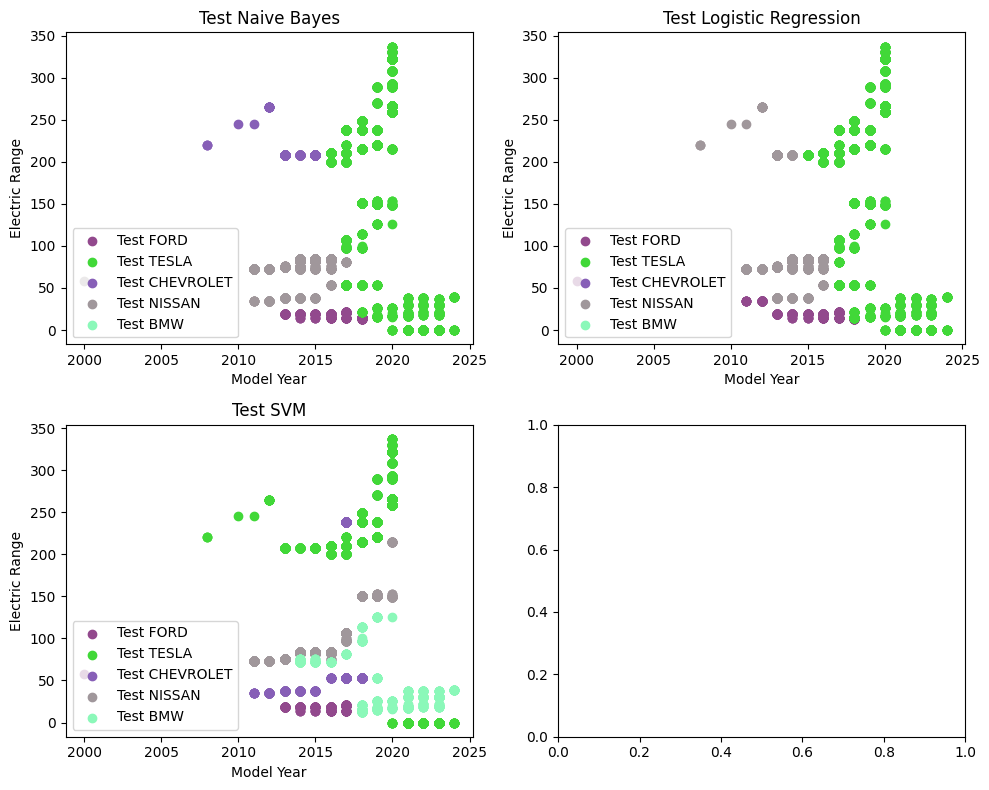

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

for i, cls in enumerate(list_class):

    ### Naive Bayes
    idxs_test = y_pred_bayes == cls
    ax[0, 0].scatter(X_test.loc[idxs_test, 'Model Year'], X_test.loc[idxs_test, 'Electric Range'], color=colors[i], label=f'Test {cls}')
    ax[0, 0].set_title(f'Test Naive Bayes')
    ax[0, 0].set_ylabel('Electric Range')
    ax[0, 0].set_xlabel('Model Year')
    ax[0, 0].legend()


    ### Logistic Regression
    idxs_test = y_pred_logistic == cls
    ax[0, 1].scatter(X_test.loc[idxs_test, 'Model Year'], X_test.loc[idxs_test, 'Electric Range'], color=colors[i], label=f'Test {cls}')
    ax[0, 1].set_title(f'Test Logistic Regression')
    ax[0, 1].set_ylabel('Electric Range')
    ax[0, 1].set_xlabel('Model Year')
    ax[0, 1].legend()

    ### SVM
    idxs_test = y_pred_svm == cls
    ax[1, 0].scatter(X_test.loc[idxs_test, 'Model Year'], X_test.loc[idxs_test, 'Electric Range'], color=colors[i], label=f'Test {cls}')
    ax[1, 0].set_title(f'Test SVM')
    ax[1, 0].set_ylabel('Electric Range')
    ax[1, 0].set_xlabel('Model Year')
    ax[1, 0].legend()

plt.tight_layout()
plt.show()


## Charging Station Placement Optimization

Objective: Predict the demand for electric vehicle charging stations in different states based on factors such as city,range, Make, Model year, Electric Vehicle Type


In [ ]:
# Training 
X_train = train_df[['City', 'Model Year', 'Make', 'Electric Vehicle Type', 'Electric Range']]
y_train = train_df[['State']]

# Test 
X_test = test_df[['City', 'Model Year', 'Make', 'Electric Vehicle Type', 'Electric Range']]
y_test = test_df[['State']]

In [ ]:
# Extracting relevant columns from the training dataset 
#X (training)
model_year = train_df.iloc[:, 5]
brand = train_df.iloc[:, 6]
vehicle_type = train_df.iloc[:, 8]
electric_range = train_df.iloc[:, 10]
city = train_df.iloc[:, 2]
#Y (taining)
state = train_df.iloc[:, 1]


# Encoding categorical variables: Brand and Vehicle Type
label_encoder_brand = LabelEncoder()
label_encoder_type = LabelEncoder()
brand_encoded = label_encoder_brand.fit_transform(brand)
type_encoded = label_encoder_type.fit_transform(vehicle_type)
state_encoded = label_encoder_type.fit_transform(state)
city_encoded = label_encoder_type.fit_transform(city)

# Combine extracted features into a feature matrix
features_encoded = np.column_stack((city_encoded,model_year, brand_encoded, type_encoded, electric_range,state_encoded))

# Splitting features and target variable
X = features_encoded[:, :-1].astype(float)
y = features_encoded[:, -1].astype(float)

#X (test)
model_year_test = test_df.iloc[:, 5]
brand_test = test_df.iloc[:, 6]
vehicle_type_test = test_df.iloc[:, 8]
electric_range_test = test_df.iloc[:, 10]
city_test = test_df.iloc[:, 2]
#Y (test)
state_test = test_df.iloc[:, 1]


# Encoding categorical variables: Brand and Vehicle Type
brand_encoded_test = label_encoder_brand.fit_transform(brand_test)
type_encoded_test = label_encoder_type.fit_transform(vehicle_type_test)
state_encoded_test = label_encoder_type.fit_transform(state_test)
city_encoded_test = label_encoder_type.fit_transform(city_test)

# Combine extracted features into a feature matrix
features_encoded_test = np.column_stack((city_encoded_test,model_year_test, brand_encoded_test, type_encoded_test, electric_range_test,state_encoded_test))

# Splitting features and target variable
X_test = features_encoded_test[:, :-1].astype(float)
y_test = features_encoded_test[:, -1].astype(float)

### Linear Regression

In [ ]:

linear_model = LinearRegression()

# Train the model
linear_model.fit(X, y)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 65.05341459837675


### Linear Ridge Regression 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder

# Création et entraînement du modèle de régression ridge
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X, y)

# Prédiction sur l'ensemble de test
y_pred = ridge_reg.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 65.0534119639599
